In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
cal=pd.read_csv("calories.csv")
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
cal.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [4]:
cal.shape

(15000, 2)

In [5]:
cal.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [10]:
exercise=pd.read_csv("exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
calex=pd.concat([exercise,cal["Calories"]],axis=1)

In [12]:
calex.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
calex.shape

(15000, 9)

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

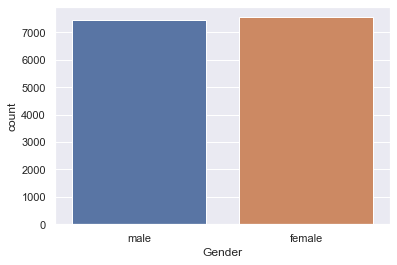

In [17]:
sns.set()
sns.countplot(calex['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

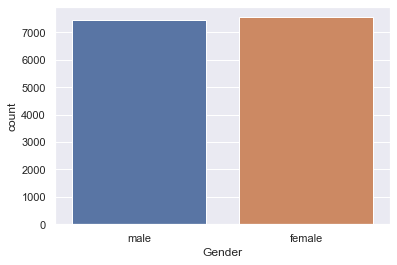

In [18]:
sns.set()
sns.countplot(x="Gender",data=calex)

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

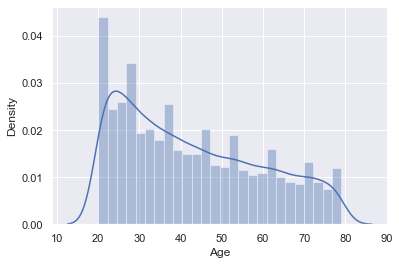

In [19]:
sns.distplot(calex["Age"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

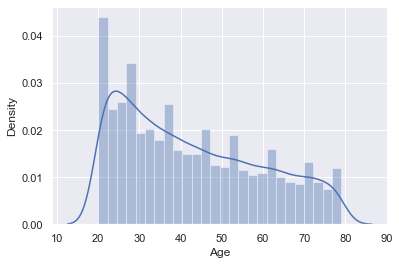

In [23]:
sns.distplot(calex['Age'])

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

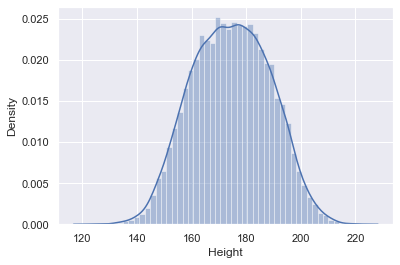

In [27]:
sns.distplot(calex['Height'])

In [28]:
correlation=calex.corr()

<AxesSubplot:>

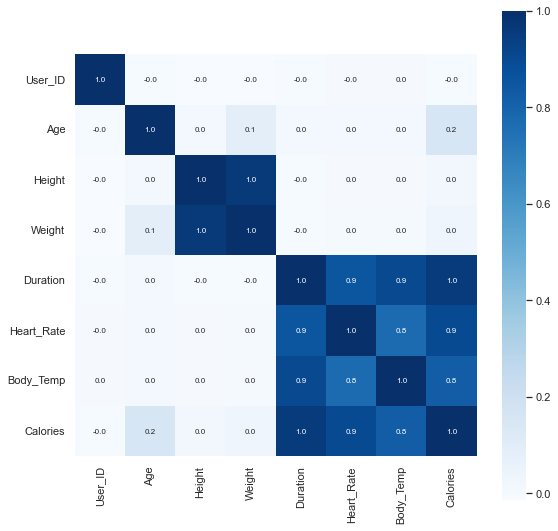

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [33]:
calex.replace({"Gender":{"male":0,"female":1}},inplace=True)

In [34]:
calex.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [35]:
x=calex.drop(columns=['User_ID',"Calories"])
y=calex["Calories"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [38]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [45]:
test_data_prediction = model.predict(x_test)

In [46]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [ ]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [49]:
input_data=(0,68,190.0,94.0,29.0,105.0,40.8)
input_data_as_np_array=np.asarray(input_data)
input_data_as_reshaped=input_data_as_np_array.reshape(1,-1)
#std_data=scaler.transform(input_data_as_reshaped)
#prediction=model.predict(std_data)
prediction=model.predict(input_data_as_reshaped)
print(prediction)



[230.88486]
